**Author: Svenja Gaedcke**  
gaedcke.svenja@mh-hannover.de  
06.12.2021  

# Setup

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import anndata

#Read config file
import configparser as config
config = config.ConfigParser()
config.read('./config.ini')

sc.settings.figdir = config["PATHS"]["OUTPUT"]+"/figs/"
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 0
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_header()

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.21.5 scipy==1.7.3 pandas==1.1.2 scikit-learn==1.0.2 statsmodels==0.12.0 python-igraph==0.8.2 louvain==0.7.0 leidenalg==0.7.0


In [2]:
sc_pt = anndata.read_h5ad(config['PATHS']["OUTPUT"]+"/sc_pt_newUmap.h5ad")
sn_pt = anndata.read_h5ad(config['PATHS']["OUTPUT"]+"/sn_pt_newUmap.h5ad")
fig_dic = config['PATHS']["OUTPUT"]+"/figs/"

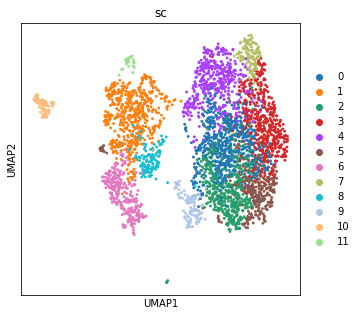

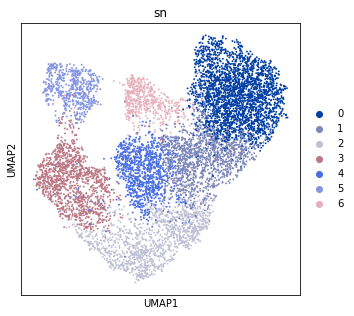

In [3]:
rcParams['figure.figsize'] = 5,5
sc.pl.umap(sc_pt ,color=["louvain"],wspace=0.4, title="sc")
sc.pl.umap(sn_pt ,color=["louvain"],wspace=0.4, title="sn")

sc_pt.obs["sample_description"] = sc_pt.obs["sample_description"].str.replace("cell_","")
sn_pt.obs["sample_description"] = sn_pt.obs["sample_description"].str.replace("nuclei_","")

sc_pt.obs["sample_description"] = sc_pt.obs["sample_description"].astype('category')
sc_pt.obs["sample_description"] = sc_pt.obs["sample_description"].cat.reorder_categories(['control','17min','27min'])

#del sn_pt.uns["louvain_colors"] #if wronge colors
sn_pt.obs["sample_description"] = sn_pt.obs["sample_description"].astype('category')
sn_pt.obs["sample_description"] = sn_pt.obs["sample_description"].cat.reorder_categories(['control','17min','27min'])                           

# PT sn  
## c 17

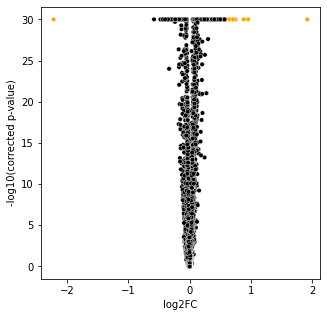

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
10336,Lpl,0.000000e+00,0.000000e+00,0.740173,0.306464,False,False
5885,Spp1,0.000000e+00,0.000000e+00,-2.218841,1.021769,False,False
18907,Keg1,0.000000e+00,0.000000e+00,1.915219,0.956644,False,False
2537,Pck1,5.618010e-300,2.570099e-296,0.747458,0.396810,False,False
6207,Aacs,1.510320e-273,5.527469e-270,0.347386,0.122592,False,False
...,...,...,...,...,...,...,...
4451,Ptpn3,4.981488e-02,1.251802e-01,-0.019729,0.038308,False,False
1895,Mettl15,4.990261e-02,1.253835e-01,-0.005267,0.005869,False,False
11408,Rec8,4.991367e-02,1.253941e-01,-0.004946,0.004270,False,False
16709,Parn,4.993986e-02,1.254426e-01,0.001939,0.036916,False,False


In [4]:
import diffxpy.api as de
tmp = sn_pt[sn_pt.obs["sample_description"] != "27min"]

#Mann-Whitney rank test (Wilcoxon rank-sum test)
test_sn_c_17 = de.test.rank_test(data=tmp.raw, is_logged=True,
    grouping=tmp.obs["sample_description"])

#test_sn_c_17.summary().sort_values(by=['qval'])[["gene", "pval", "qval","log2fc", "mean"]].to_csv(config["PATH"]["OUTPUT"] +"/DGE_PTsn_c_17.csv")
test_sn_c_17.summary().sort_values(by=['pval']).head(40)
test_sn_c_17.plot_volcano(corrected_pval=True, min_fc=1.5, alpha=0.05, size=20)

test_sn_c_17 =  test_sn_c_17.summary()[test_sn_c_17.summary()["pval"] < 0.05]
test_sn_c_17 = test_sn_c_17.sort_values(by=["qval"])
test_sn_c_17

In [5]:
%%capture
grid = sc.pl.clustermap(sn_pt[:,test_sn_c_17["gene"][1:20]],obs_keys="sample_description", 
                 use_raw=False, row_cluster=False, cmap='viridis', show=False)
dge_order = grid.dendrogram_col.reordered_ind
genes = [test_sn_c_17[1:20].reset_index()["gene"][i] for i in dge_order]

Sn-data,  DGE sn C vs 17


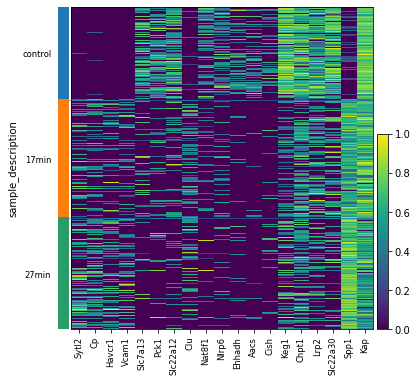

Sc-data,  DGE sn C vs 17


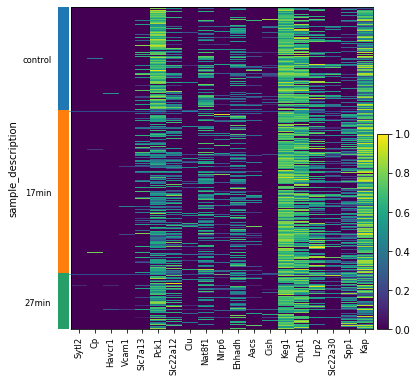

In [6]:
print("Sn-data,  DGE sn C vs 17")
sc.pl.heatmap(sn_pt,
             var_names =genes,
             groupby="sample_description", log=True,
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False, show =False)#, save="_sn_c_17_snData.pdf")
plt.show()

print("Sc-data,  DGE sn C vs 17")
sc.pl.heatmap(sc_pt,
             var_names= genes,
             groupby="sample_description", log=True,
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sn_c_17_scData.pdf")

## c 27

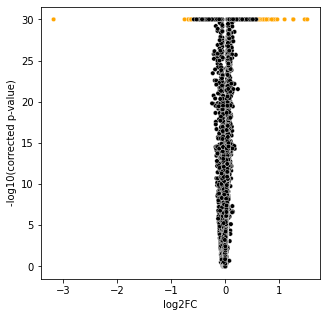

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
5885,Spp1,0.000000,0.000000,-3.182702,1.365377,False,False
8701,Acsm3,0.000000,0.000000,0.648076,0.247342,False,False
8695,Acsm2,0.000000,0.000000,1.103371,0.922958,False,False
7405,Kap,0.000000,0.000000,1.262448,1.991166,False,False
18774,Slc22a12,0.000000,0.000000,0.716418,0.422666,False,False
...,...,...,...,...,...,...,...
19157,Trim8,0.049888,0.103024,-0.035572,0.067561,False,False
10457,Slc35e1,0.049944,0.103129,0.002152,0.007011,False,False
3689,Rfx5,0.049963,0.103156,0.001916,0.027639,False,False
10562,Hook2,0.049985,0.103190,-0.008287,0.213216,False,False


In [7]:
import diffxpy.api as de
tmp = sn_pt[sn_pt.obs["sample_description"] != "17min"]

#Mann-Whitney rank test (Wilcoxon rank-sum test)
test_sn_c_27 = de.test.rank_test(data=tmp.raw, is_logged=True,
    grouping=tmp.obs["sample_description"])

#test_sn_c_27.summary().sort_values(by=['pval'])[["gene", "pval", "qval", "log2fc", "mean"]].to_csv(config["PATH"]["OUTPUT"]+"/DGE_PTsn_c_27.csv")
test_sn_c_27.summary().sort_values(by=['pval']).head(40)
test_sn_c_27.plot_volcano(corrected_pval=True, min_fc=1.5, alpha=0.05, size=20)

test_sn_c_27 =  test_sn_c_27.summary()[test_sn_c_27.summary()["pval"] < 0.05]
test_sn_c_27 = test_sn_c_27.sort_values(by=["qval"])
test_sn_c_27

In [8]:
%%capture
grid = sc.pl.clustermap(sn_pt[:,test_sn_c_27["gene"][1:20]],obs_keys="sample_description", 
                 use_raw=False, row_cluster=False, cmap='viridis', show=False)
dge_order = grid.dendrogram_col.reordered_ind
genes = [test_sn_c_27[1:20].reset_index()["gene"][i] for i in dge_order]

Sn-data,  DGE sn C vs 27


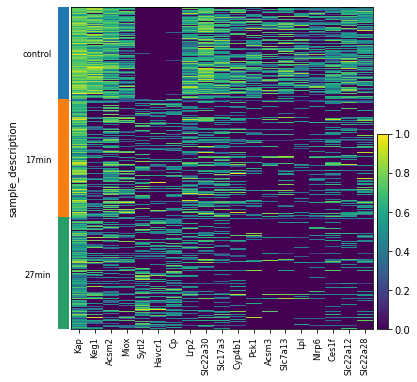

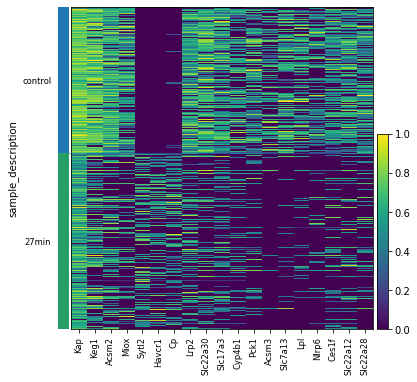

Sc-data,  DGE sn C vs 27


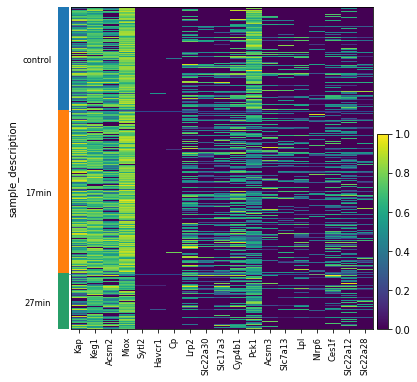

In [9]:
print("Sn-data,  DGE sn C vs 27")
sc.pl.heatmap(sn_pt,
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sn_c_27_snData.pdf")
plt.show()


sc.pl.heatmap(sn_pt[sn_pt.obs["sample_description"] != "17min"],
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sn_c_27_wo17_snData.pdf")
plt.show()

print("Sc-data,  DGE sn C vs 27")
sc.pl.heatmap(sc_pt,
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sn_c_27_scData.pdf")

## 17 27

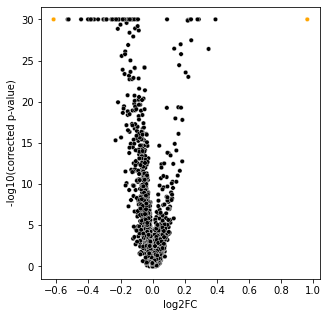

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
5885,Spp1,2.066394e-303,3.821382e-299,0.963861,2.024664,False,False
7405,Kap,6.660507e-127,6.158638e-123,-0.617037,1.813233,False,False
8695,Acsm2,1.400146e-91,8.630969e-88,-0.529503,0.763962,False,False
18640,Acy3,4.696508e-83,2.171313e-79,-0.287192,0.219603,False,False
8691,Umod,1.923295e-77,7.113499e-74,-0.304552,0.373675,False,False
...,...,...,...,...,...,...,...
6287,Lrwd1,4.972048e-02,2.042837e-01,-0.004468,0.017315,False,False
7419,Cdkn1b,4.979074e-02,2.045269e-01,-0.004067,0.077138,False,False
16180,Kifc2,4.985048e-02,2.047268e-01,-0.008627,0.022811,False,False
11402,Fitm1,4.993178e-02,2.050152e-01,-0.004024,0.007460,False,False


In [10]:
import diffxpy.api as de
tmp = sn_pt[sn_pt.obs["sample_description"] != "control"]

#Mann-Whitney rank test (Wilcoxon rank-sum test)
test_sn_17_27 = de.test.rank_test(data=tmp.raw, is_logged=True,
    grouping=tmp.obs["sample_description"])

#test_sn_17_27.summary().sort_values(by=['pval'])[["gene", "pval", "qval", "log2fc", "mean"]].to_csv(config["PATH"]["OUTPUT"]+"/DGE_PTsn_17_27.csv")
test_sn_17_27.summary().sort_values(by=['pval']).head(40)
test_sn_17_27.plot_volcano(corrected_pval=True, min_fc=1.5, alpha=0.05, size=20)

test_sn_17_27 =  test_sn_17_27.summary()[test_sn_17_27.summary()["pval"] < 0.05]
test_sn_17_27 = test_sn_17_27.sort_values(by=["qval"])
test_sn_17_27

In [11]:
%%capture
grid = sc.pl.clustermap(sn_pt[:,test_sn_17_27["gene"][1:20]],obs_keys="sample_description", 
                 use_raw=False, row_cluster=False, cmap='viridis', show=False)
dge_order = grid.dendrogram_col.reordered_ind
genes = [test_sn_17_27[1:20].reset_index()["gene"][i] for i in dge_order]

Sn-data,  DGE sn 17 vs 27


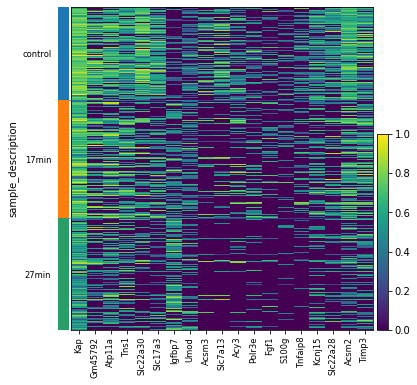

Sc-data,  DGE sn 17 vs 27


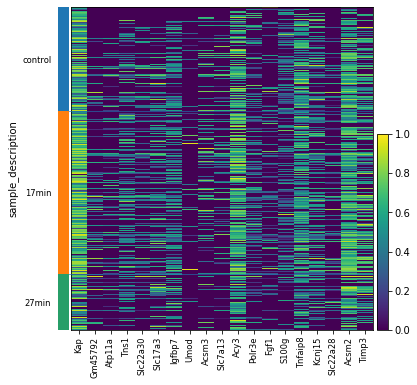

In [12]:
print("Sn-data,  DGE sn 17 vs 27")
sc.pl.heatmap(sn_pt,
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sn_17_27_snData.pdf")
plt.show()

print("Sc-data,  DGE sn 17 vs 27")
sc.pl.heatmap(sc_pt,
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sn_17_27_scData.pdf")

# PT sc
## c 17

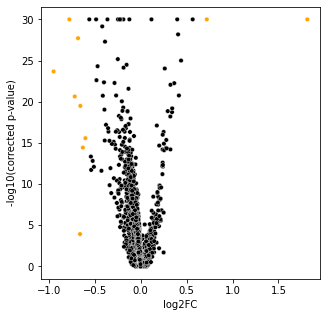

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
2702,Pck1,1.799081e-232,3.021737e-228,1.813483,1.449477,False,False
6215,Spp1,6.500332e-85,5.458979e-81,-0.776129,0.617709,False,False
19681,Cd74,1.520930e-57,8.515178e-54,-0.360849,0.223771,False,False
18986,Gm42418,1.485764e-51,6.238722e-48,0.720719,2.214480,False,False
3404,Tmsb4x,2.126194e-50,7.142310e-47,-0.558645,0.662106,False,False
...,...,...,...,...,...,...,...
110,Plekhb2,4.987372e-02,1.189716e-01,0.009823,0.307230,False,False
13636,Slc6a20a,4.991087e-02,1.190433e-01,-0.004470,0.009086,False,False
998,Gm26620,4.991862e-02,1.190437e-01,-0.007033,0.014308,False,False
9981,Hnrnph3,4.992519e-02,1.190437e-01,0.003744,0.067717,False,False


In [13]:
import diffxpy.api as de
tmp = sc_pt[sc_pt.obs["sample_description"] != "27min"]

#Mann-Whitney rank test (Wilcoxon rank-sum test)
test_sc_c_17 = de.test.rank_test(data=tmp.raw, is_logged=True,
    grouping=tmp.obs["sample_description"])

#test_sc_c_17.summary().sort_values(by=['pval'])[["gene", "pval", "qval", "log2fc", "mean"]].to_csv(config["PATH"]["OUTPUT"]+"/DGE_PTsc_c_17.csv")
test_sc_c_17.summary().sort_values(by=['pval']).head(40)
test_sc_c_17.plot_volcano(corrected_pval=True, min_fc=1.5, alpha=0.05, size=20)

test_sc_c_17 =  test_sc_c_17.summary()[test_sc_c_17.summary()["pval"] < 0.05]
test_sc_c_17 = test_sc_c_17.sort_values(by=["qval"])
test_sc_c_17

In [14]:
%%capture
grid = sc.pl.clustermap(sc_pt[:,test_sc_c_17["gene"][1:20]],obs_keys="sample_description", 
                 use_raw=False, row_cluster=False, cmap='viridis', show=False)
dge_order = grid.dendrogram_col.reordered_ind
genes = [test_sc_c_17[1:20].reset_index()["gene"][i] for i in dge_order]

Sc-data,  DGE sc C vs 17


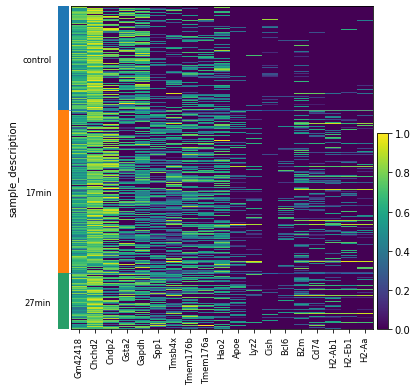

Sn-data,  DGE sc C vs 17


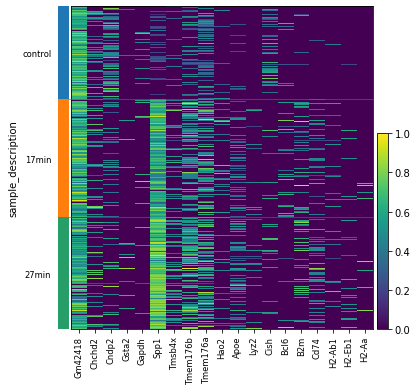

In [15]:
print("Sc-data,  DGE sc C vs 17")
sc.pl.heatmap(sc_pt,
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sc_c_17_scData.pdf")

print("Sn-data,  DGE sc C vs 17")
sc.pl.heatmap(sn_pt,
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sc_c_17_snData.pdf")

## c 27

['27min' 'control']


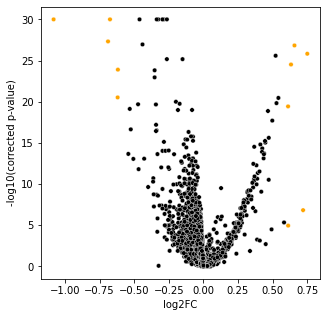

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
6215,Spp1,2.149739e-73,3.418729e-69,-1.082020,0.550784,False,False
20344,Cpn1,4.147602e-50,3.297966e-46,-0.674661,0.416687,False,False
7167,Tmem176b,2.705450e-31,4.780530e-28,-0.688927,0.641850,False,False
1549,Ass1,1.009263e-30,1.459120e-27,0.658610,2.268618,False,False
2702,Pck1,1.136675e-29,1.506378e-26,0.751258,2.035514,False,False
17489,Miox,3.047227e-28,3.028753e-25,0.633700,2.517470,False,False
3404,Tmsb4x,1.361243e-27,1.273403e-24,-0.617438,0.574914,False,False
10613,Cd63,3.765301e-24,2.993979e-21,-0.619166,0.761143,False,False
7229,Inmt,6.286794e-23,3.702922e-20,0.612442,0.822613,False,False
20495,mt-Co3,2.456195e-09,1.473995e-07,0.721038,2.538026,False,False


In [16]:
import diffxpy.api as de
tmp = sc_pt[sc_pt.obs["sample_description"] != "17min"]
#sc.pp.subsample(tmp, fraction=0.1,random_state=0, copy=False)
print(np.unique(tmp.obs.sample_description))

#Mann-Whitney rank test (Wilcoxon rank-sum test)
test_sc_c_27 = de.test.rank_test(data=tmp.raw, is_logged=True,
    grouping=tmp.obs["sample_description"])

test_sc_c_27.summary().sort_values(by=['pval']).head(40)
test_sc_c_27.plot_volcano(corrected_pval=True, min_fc=1.5, alpha=0.05, size=20)

test_sc_c_27 =  test_sc_c_27.summary()[test_sc_c_27.summary()["pval"] < 0.05]
test_sc_c_27 =  test_sc_c_27[(test_sc_c_27["log2fc"] < -0.585) |
                                       (test_sc_c_27["log2fc"] > 0.585)]
test_sc_c_27 = test_sc_c_27.sort_values(by=["qval"])
test_sc_c_27.head(20)

['27min' 'control']


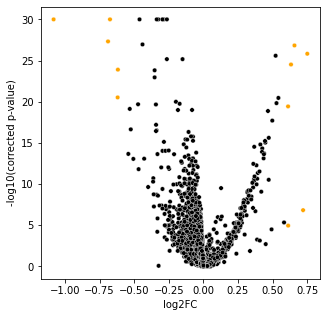

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
6215,Spp1,2.149739e-73,3.418729e-69,-1.082020,0.550784,False,False
20344,Cpn1,4.147602e-50,3.297966e-46,-0.674661,0.416687,False,False
19681,Cd74,2.475198e-45,1.312103e-41,-0.461118,0.182512,False,False
8250,Apoe,4.106957e-43,1.632823e-39,-0.325710,0.136394,False,False
3724,Fgg,5.338292e-43,1.697897e-39,-0.287402,0.086429,False,False
11215,Junb,2.535047e-42,6.719143e-39,-0.336684,0.127687,False,False
18849,H2-Ab1,4.105426e-40,9.326941e-37,-0.295758,0.110090,False,False
18850,H2-Aa,1.069221e-36,2.125478e-33,-0.263516,0.096301,False,False
7167,Tmem176b,2.705450e-31,4.780530e-28,-0.688927,0.641850,False,False
639,Dbi,6.931022e-31,1.102240e-27,-0.439649,2.611399,False,False


In [17]:
import diffxpy.api as de
tmp = sc_pt[sc_pt.obs["sample_description"] != "17min"]
print(np.unique(tmp.obs.sample_description))

#Mann-Whitney rank test (Wilcoxon rank-sum test)
test_sc_c_27 = de.test.rank_test(data=tmp.raw, is_logged=True,
    grouping=tmp.obs["sample_description"])

#test_sc_c_27.summary().sort_values(by=['pval'])[["gene", "pval", "qval", "log2fc", "mean"]].to_csv(config["PATH"]["OUTPUT"]+"/DGE_PTsc_c_27.csv")
test_sc_c_27.summary().sort_values(by=['pval']).head(40)
test_sc_c_27.plot_volcano(corrected_pval=True, min_fc=1.5, alpha=0.05, size=20)

test_sc_c_27 =  test_sc_c_27.summary()[test_sc_c_27.summary()["pval"] < 0.05]
test_sc_c_27 = test_sc_c_27.sort_values(by=["qval"])
test_sc_c_27.head(20)

In [18]:
%%capture
grid = sc.pl.clustermap(sc_pt[:,test_sc_c_27["gene"][1:20]],obs_keys="sample_description", 
                 use_raw=False, row_cluster=False, cmap='viridis', show=False)
dge_order = grid.dendrogram_col.reordered_ind
genes = [test_sc_c_27[1:20].reset_index()["gene"][i] for i in dge_order]

Sc-data,  DGE sc C vs 27


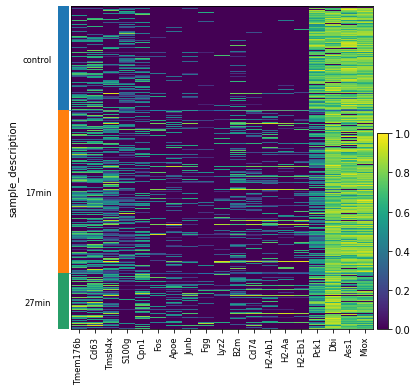

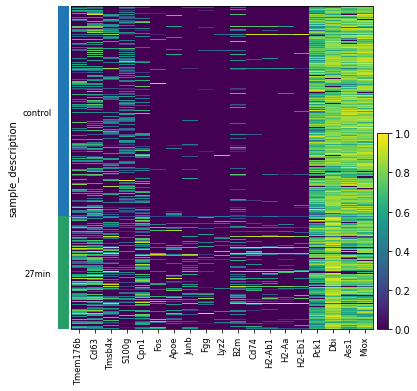

Sn-data,  DGE sc C vs 27


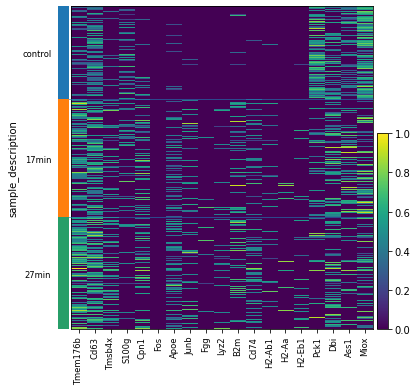

In [19]:
print("Sc-data,  DGE sc C vs 27")
sc.pl.heatmap(sc_pt,
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sc_c_27_scData.pdf")
plt.show()

sc.pl.heatmap(sc_pt[sc_pt.obs["sample_description"] != "17min"],
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sc_c_27_wo17_scData.pdf")
plt.show()

print("Sn-data,  DGE sc C vs 27")
sc.pl.heatmap(sn_pt,
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sn_c_27_snData.pdf")

## 17 27

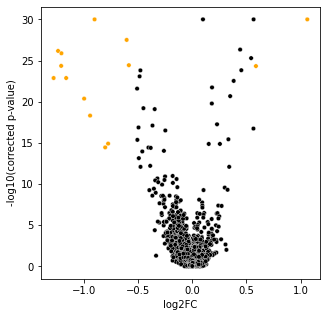

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
2702,Pck1,4.587204e-73,7.687237e-69,1.062225,1.147571,False,False
17489,Miox,6.264961e-66,5.249411e-62,-0.904666,2.698897,False,False
13382,Cish,9.835658e-44,5.494198e-40,0.097627,0.022109,False,False
20344,Cpn1,9.582696e-36,4.014670e-32,0.566038,0.428719,False,False
7229,Inmt,9.325468e-32,3.125524e-28,-0.608033,0.860363,False,False
...,...,...,...,...,...,...,...
19384,Cables1,4.983309e-02,2.960053e-01,0.005374,0.001880,False,False
5608,Agrn,4.984646e-02,2.960053e-01,0.010609,0.031803,False,False
8240,Ppp1r37,4.994418e-02,2.963755e-01,-0.037618,0.111459,False,False
2862,Dynlt3,4.994234e-02,2.963755e-01,-0.030008,0.228298,False,False


In [20]:
import diffxpy.api as de
tmp = sc_pt[sc_pt.obs["sample_description"] != "control"]

#Mann-Whitney rank test (Wilcoxon rank-sum test)
test_sc_17_27 = de.test.rank_test(data=tmp.raw, is_logged=True,
    grouping=tmp.obs["sample_description"])

#test_sc_17_27.summary().sort_values(by=['pval'])[["gene", "pval","qval", "log2fc", "mean"]].to_csv(config["PATH"]["OUTPUT"]+"/DGE_PTsc_17_27.csv")
test_sc_17_27.summary().sort_values(by=['pval']).head(40)
test_sc_17_27.plot_volcano(corrected_pval=True, min_fc=1.5, alpha=0.05, size=20)

test_sc_17_27 =  test_sc_17_27.summary()[test_sc_17_27.summary()["pval"] < 0.05]
test_sc_17_27 = test_sc_17_27.sort_values(by=["qval"])
test_sc_17_27

In [21]:
%%capture
grid = sc.pl.clustermap(sc_pt[:,test_sc_17_27["gene"][1:20]],obs_keys="sample_description", 
                 use_raw=False, row_cluster=False, cmap='viridis', show=False)
dge_order = grid.dendrogram_col.reordered_ind
genes = [test_sc_17_27[1:20].reset_index()["gene"][i] for i in dge_order]

Sc-data,  DGE sc 17 vs 27


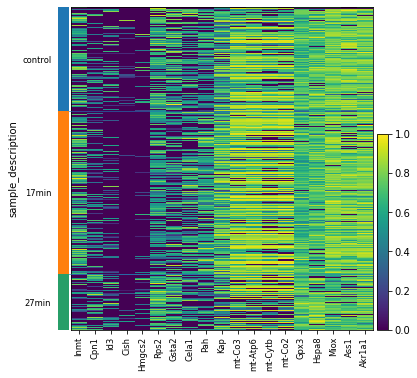

Sn-data,  DGE sc 17 vs 27


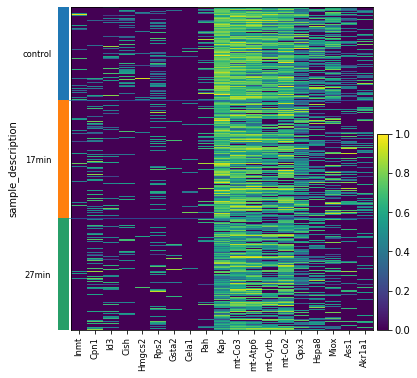

In [22]:
print("Sc-data,  DGE sc 17 vs 27")
sc.pl.heatmap(sc_pt,
             var_names= genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sc_17_27_scData.pdf")

print("Sn-data,  DGE sc 17 vs 27")
sc.pl.heatmap(sn_pt,
             var_names=genes,
             groupby="sample_description", log=True, 
            standard_scale= "var", #scale by var=scale per gene
             swap_axes=False)#, save="_sc_17_27_snData.pdf")

# Make table of expressions for  sc and sn

In [23]:
gene_ids = sc_pt.raw.var.index.values
sc_pt.obs['sample_description'] = sc_pt.obs['sample_description'].astype("category")
clusters = sc_pt.obs['sample_description'].cat.categories
obs = sc_pt.raw[:,gene_ids].X.toarray()
obs = pd.DataFrame(obs,columns=gene_ids,index=sc_pt.obs['sample_description'].astype("str"))
average_obs_sc = obs.groupby(level=0).mean()
obs_bool = obs.astype(bool)
average_obs_sc = average_obs_sc.T

gene_ids = sn_pt.raw.var.index.values
sn_pt.obs['sample_description'] = sn_pt.obs['sample_description'].astype("category")
clusters = sn_pt.obs['sample_description'].cat.categories
obs = sn_pt.raw[:,gene_ids].X.toarray()
obs = pd.DataFrame(obs,columns=gene_ids,index=sn_pt.obs['sample_description'].astype("str"))
average_obs_sn = obs.groupby(level=0).mean()
obs_bool = obs.astype(bool)
average_obs_sn= average_obs_sn.T

In [24]:
average_obs = pd.merge(average_obs_sn, average_obs_sc,left_index=True, right_index=True,
     suffixes=('_sn', '_sc'))
average_obs["c_FC"] = average_obs.control_sn / average_obs.control_sc
average_obs["17_FC"] = average_obs["17min_sn"] / average_obs["17min_sc"]
average_obs["27_FC"] = average_obs["27min_sn"] / average_obs["27min_sc"]

#average_obs.to_csv(config["PATH"]["OUTPUT"]+"/expressionValues_sn_sc.csv")
average_obs

sample_description,17min_sn,27min_sn,control_sn,17min_sc,27min_sc,control_sc,c_FC,17_FC,27_FC
Xkr4,0.001154,0.000713,0.000000,0.000000,0.000000,0.000000,NaN,inf,inf
Rp1,0.000000,0.000000,0.000831,0.000000,0.000000,0.000000,inf,NaN,NaN
Sox17,0.002595,0.002506,0.001516,0.004048,0.000371,0.002375,0.638188,0.641122,6.751775
Gm37323,0.000309,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,inf,NaN
Mrpl15,0.046141,0.048296,0.060895,0.215678,0.195068,0.232602,0.261799,0.213936,0.247585
...,...,...,...,...,...,...,...,...,...
Csprs,0.000731,0.000205,0.000142,0.001526,0.002187,0.000806,0.176502,0.478989,0.093536
AC168977.1,0.000000,0.000183,0.000000,0.000000,0.000000,0.000000,NaN,NaN,inf
AC149090.1,0.607452,0.656107,0.748810,0.118554,0.102158,0.100888,7.422221,5.123841,6.422484
CAAA01118383.1,0.053013,0.051436,0.034610,0.048024,0.042319,0.041709,0.829786,1.103893,1.215441


In [25]:
average_obs["c_FC_color"] = pd.cut(average_obs.c_FC, [0, 0.5,  2, np.inf], labels=["orange", "grey", "blue"])
average_obs["17_FC_color"] = pd.cut(average_obs["17_FC"], [0, 0.5,  2, np.inf], 
    labels=["orange", "grey", "blue"])
average_obs["27_FC_color"] = pd.cut(average_obs["27_FC"], [0, 0.5,  2, np.inf], 
    labels=["orange", "grey", "blue"])
#average_obs.to_csv(config["PATH"]["OUTPUT"]+"/expressionValues_sn_sc.csv")
average_obs

sample_description,17min_sn,27min_sn,control_sn,17min_sc,27min_sc,control_sc,c_FC,17_FC,27_FC,c_FC_color,17_FC_color,27_FC_color
Xkr4,0.001154,0.000713,0.000000,0.000000,0.000000,0.000000,NaN,inf,inf,NaN,blue,blue
Rp1,0.000000,0.000000,0.000831,0.000000,0.000000,0.000000,inf,NaN,NaN,blue,NaN,NaN
Sox17,0.002595,0.002506,0.001516,0.004048,0.000371,0.002375,0.638188,0.641122,6.751775,grey,grey,blue
Gm37323,0.000309,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,inf,NaN,NaN,blue,NaN
Mrpl15,0.046141,0.048296,0.060895,0.215678,0.195068,0.232602,0.261799,0.213936,0.247585,orange,orange,orange
...,...,...,...,...,...,...,...,...,...,...,...,...
Csprs,0.000731,0.000205,0.000142,0.001526,0.002187,0.000806,0.176502,0.478989,0.093536,orange,orange,orange
AC168977.1,0.000000,0.000183,0.000000,0.000000,0.000000,0.000000,NaN,NaN,inf,NaN,NaN,blue
AC149090.1,0.607452,0.656107,0.748810,0.118554,0.102158,0.100888,7.422221,5.123841,6.422484,blue,blue,blue
CAAA01118383.1,0.053013,0.051436,0.034610,0.048024,0.042319,0.041709,0.829786,1.103893,1.215441,grey,grey,grey


In [26]:
#average_obs[(average_obs.control_sn > 0) & 
 #           (average_obs.control_sc > 0)][["control_sn","control_sc", "c_FC",
 #          "c_FC_color"]].to_csv(config["PATH"]["OUTPUT"]+"/expressionValues_sn_sc_Control.csv")

#average_obs[(average_obs["17min_sn"] > 0) & 
 #           (average_obs["17min_sc"] > 0)][["17min_sn","17min_sc", "17_FC",
 #           "17_FC_color"]].to_csv(config["PATH"]["OUTPUT"]+"/expressionValues_sn_sc_17.csv")

#average_obs[(average_obs["27min_sn"] > 0) & 
 #           (average_obs["27min_sc"] > 0)][["27min_sn","27min_sc", "27_FC",
 #           "27_FC_color"]].to_csv(config["PATH"]["OUTPUT"]+"/expressionValues_sn_sc_27.csv")

# save Notebook

In [27]:
%%bash
jupyter nbconvert --to html_toc differential_exp_sc_sn.ipynb --ExtractOutputPreprocessor.enabled=False
#mv differential_exp_sc_sn.html ./differential_exp_sc_sn.html 

[NbConvertApp] Converting notebook differential_exp_sc_sn.ipynb to html_toc
[NbConvertApp] Writing 1394555 bytes to differential_exp_sc_sn.html
